In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import time
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

trainCopy=train.copy()
testCopy=test.copy()

In [4]:
print('dimmensions of train dataset:',train.shape)
train.head()


dimmensions of train dataset: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('dimmensions of test dataset:',test.shape)
test.head()

dimmensions of test dataset: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


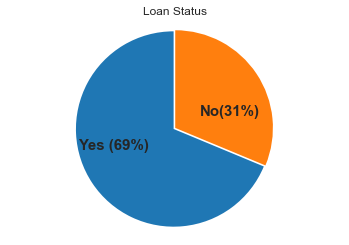

In [7]:
plt.pie(train.Loan_Status.value_counts(normalize=True),explode=[0,0.05],labels=['Yes (69%)','No(31%)'],radius=2.5,
       startangle=90,labeldistance=0.3,textprops={'fontsize':15,'fontweight':'bold'})
plt.title('Loan Status')
plt.axis('equal')
plt.show()

In [8]:
train.columns=train.columns.str.lower()
test.columns=test.columns.str.lower()

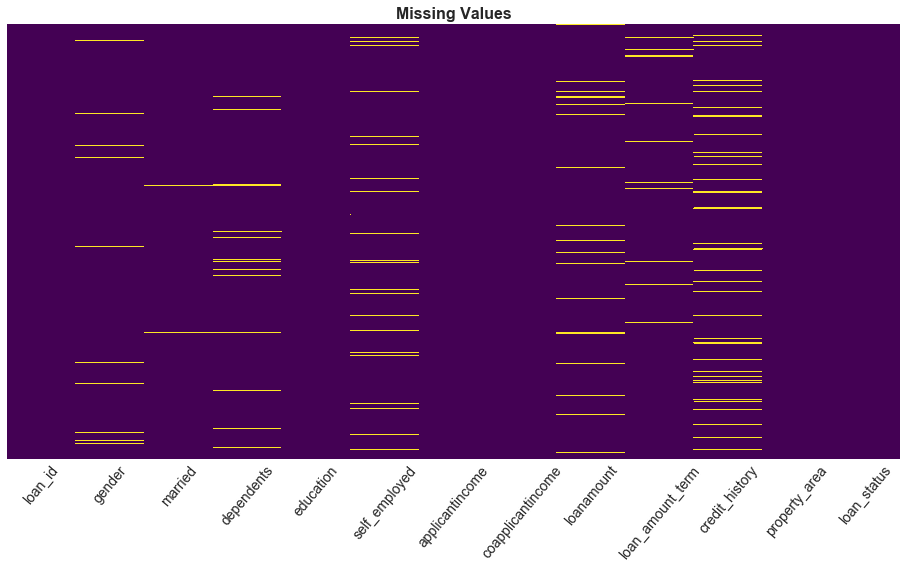

In [9]:
plt.figure(figsize=(16,8))
sb.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.xticks(fontsize=14,rotation=50)
plt.title('Missing Values',fontsize=16,fontweight='bold')
plt.show()


### 'gender','married','dependents','self_employed','loanamount','loan_amount_term','credit_history' are having missing values 

In [10]:
count=train.isnull().sum().values
percent=np.round(train.isnull().sum().values/len(train)*100,2)
missing_info=pd.DataFrame({'count':count,
                           'percentage':percent},index=train.columns).sort_values(by='percentage',
                                                                                  ascending=False)
missing_info
# train data

,count,percentage
credit_history,50,8.14
self_employed,32,5.21
loanamount,22,3.58
dependents,15,2.44
loan_amount_term,14,2.28
gender,13,2.12
married,3,0.49
loan_id,0,0.00
education,0,0.00
applicantincome,0,0.00


In [11]:
count=test.isnull().sum().values
percent=np.round(test.isnull().sum().values/len(test)*100,2)
missing_info=pd.DataFrame({'count':count,
                           'percentage':percent},index=test.columns).sort_values(by='percentage',
                                                                                  ascending=False)
missing_info
# test data

,count,percentage
credit_history,29,7.90
self_employed,23,6.27
gender,11,3.00
dependents,10,2.72
loan_amount_term,6,1.63
loanamount,5,1.36
loan_id,0,0.00
married,0,0.00
education,0,0.00
applicantincome,0,0.00


### Above missing value numbes suggest the small portion of data is missing, which can be imputed using statistics (mean,median and mode)
### credit_history, gender, married, self_employed, dependents and loan_amount_term are categorical variables which can be filled using mode
### loan_amount is numerical so will fill it by mean/median

In [12]:
# imputing missing values in train data
#intutively, good credit history means higher chance of loan approval

# def credit_history(cols):
#     x=cols[0]
#     y=cols[1]
#     if np.isnan(x) and y=='Y':
#         return(1)
#     elif np.isnan(x) and y=='N':
#         return(0)
#     else:
#         return(x)
   
train['credit_history'].fillna(train.credit_history.mode()[0],inplace=True)
train['gender'].fillna(train.gender.mode()[0],inplace=True)
train['married'].fillna(train.married.mode()[0],inplace=True)
train['dependents'].fillna(train.dependents.mode()[0],inplace=True)
train['self_employed'].fillna(train.self_employed.mode()[0],inplace=True)
train['loan_amount_term'].fillna(train.loan_amount_term.mode()[0],inplace=True)
train['loanamount'].fillna(train.loanamount.median(),inplace=True)

test['credit_history'].fillna(test.credit_history.mode()[0],inplace=True)
test['gender'].fillna(test.gender.mode()[0],inplace=True)
test['dependents'].fillna(test.dependents.mode()[0],inplace=True)
test['self_employed'].fillna(test.self_employed.mode()[0],inplace=True)
test['loan_amount_term'].fillna(test.loan_amount_term.mode()[0],inplace=True)
test['loanamount'].fillna(test.loanamount.median(),inplace=True)



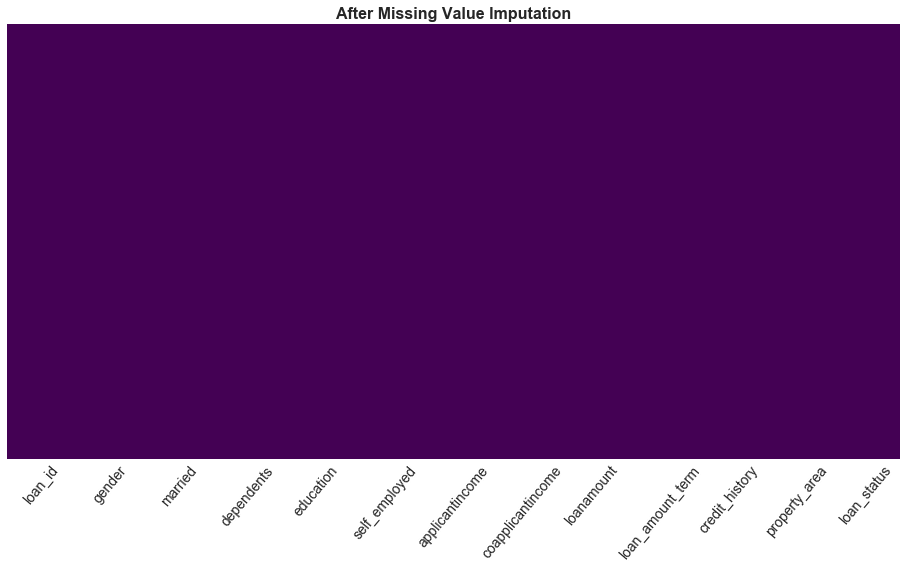

In [13]:
plt.figure(figsize=(16,8))
sb.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.xticks(fontsize=14,rotation=50)
plt.title('After Missing Value Imputation',fontsize=16,fontweight='bold')
plt.show()

# Exploratory Data Analysis

### Hypothesis to check
### 1. Customers whose credit history is good will have loan approval
### 2. Highly educated people will have loan approval
### 3. Lesser the dependents higher the chance of loan approval
### 4. Higher the applicant income higher the chances of loan approval
### 5. Higher the co-applicant income higher the chances of loan approval
### 6. Bigger the property area higher the chances of loan approval

### We will use Univariate and bi-variate analysis to check those hypothesis

#### Univariate plots

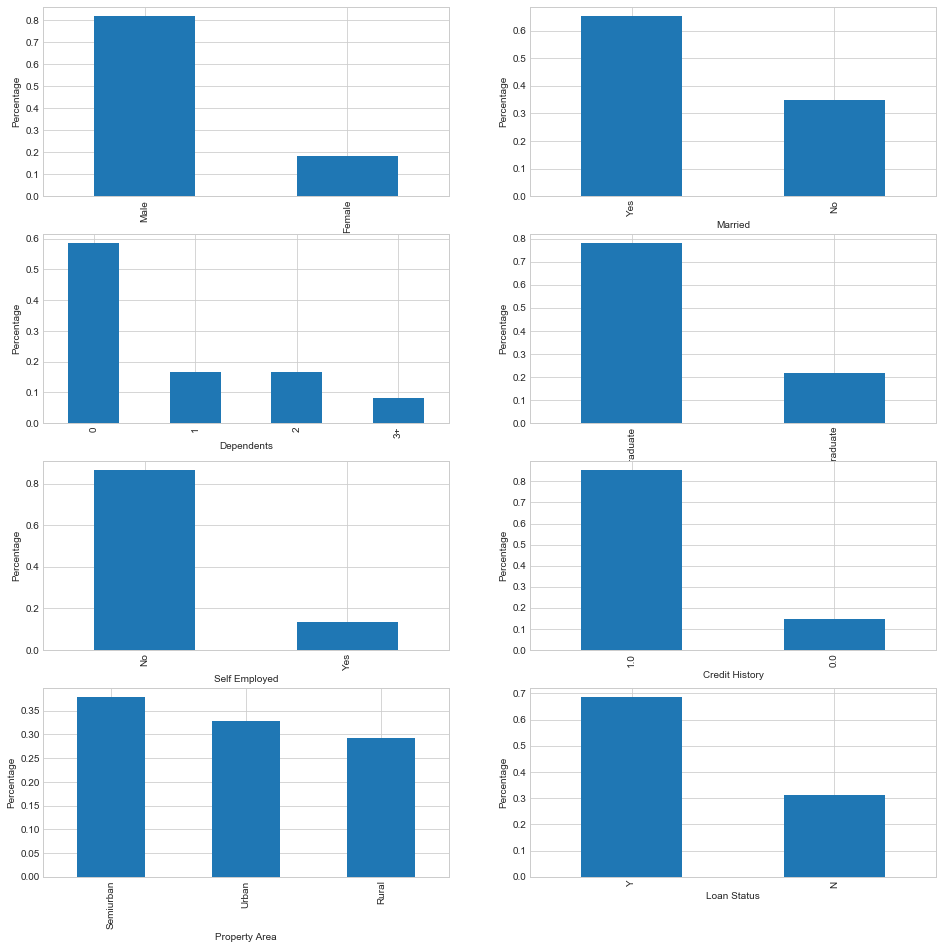

In [14]:
# f,ax=plt.subplots(3,2,figsize=(15,15))
# sb.countplot(train.gender.value_counts(),ax=ax[0,0])
plt.subplot(421)
train['gender'].value_counts(normalize=True).plot(kind='bar',figsize=(16,16));plt.xlabel('Gender');plt.ylabel('Percentage')

plt.subplot(422)
train['married'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Married');plt.ylabel('Percentage')

plt.subplot(423)
train['dependents'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Dependents');plt.ylabel('Percentage')

plt.subplot(424)
train['education'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Education');plt.ylabel('Percentage')

plt.subplot(425)
train['self_employed'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Self Employed');plt.ylabel('Percentage')

plt.subplot(426)
train['credit_history'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Credit History');plt.ylabel('Percentage')

plt.subplot(427)
train['property_area'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Property Area');plt.ylabel('Percentage')

plt.subplot(428)
train['loan_status'].value_counts(normalize=True).plot(kind='bar');plt.xlabel('Loan Status');plt.ylabel('Percentage')
plt.show()

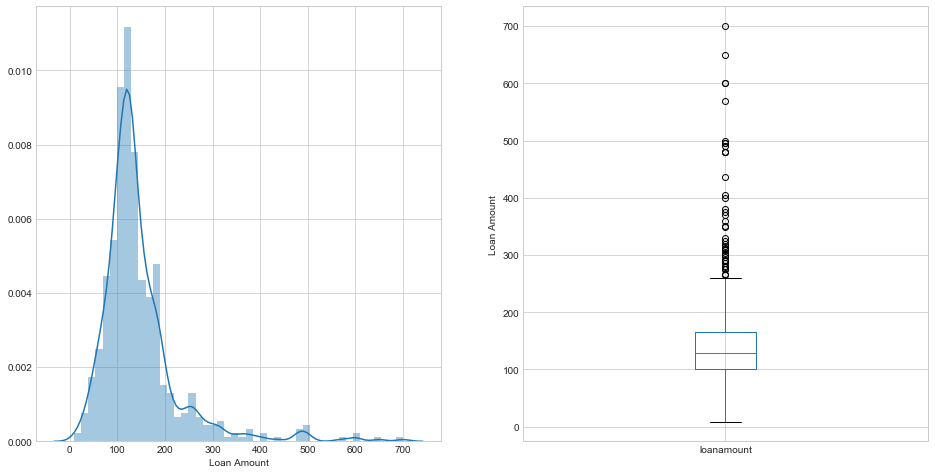

In [15]:
plt.subplot(121)
sb.distplot(train['loanamount']);plt.xlabel('Loan Amount')
plt.subplot(122)
train['loanamount'].plot(kind='box',figsize=(16,8));plt.ylabel('Loan Amount');plt.xlabel('')
plt.show()

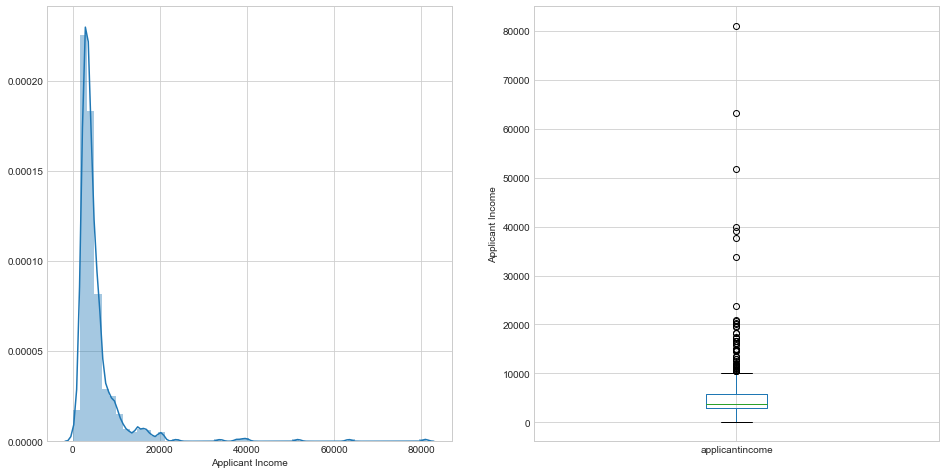

In [16]:
plt.subplot(121)
sb.distplot(train['applicantincome']);plt.xlabel('Applicant Income')
plt.subplot(122)
train['applicantincome'].plot(kind='box',figsize=(16,8));plt.ylabel('Applicant Income');plt.xlabel('')
plt.show()

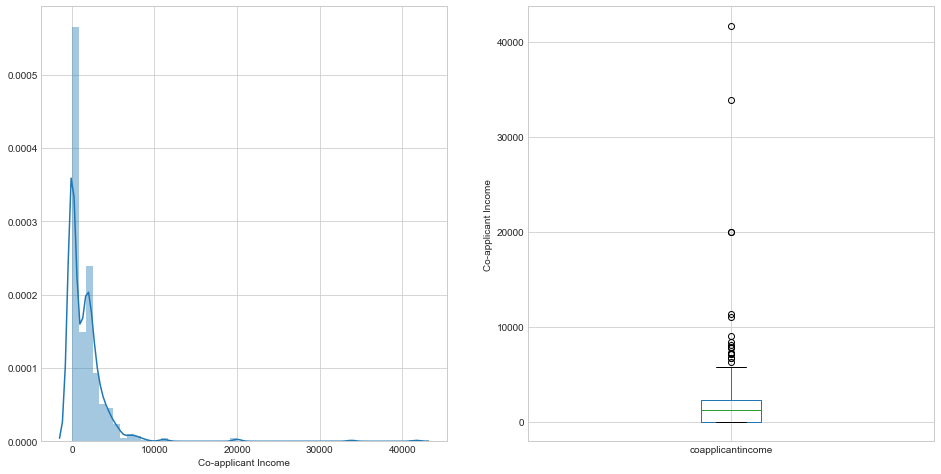

In [17]:
plt.subplot(121)
sb.distplot(train['coapplicantincome']);plt.xlabel('Co-applicant Income')
plt.subplot(122)
train['coapplicantincome'].plot(kind='box',figsize=(16,8));plt.ylabel('Co-applicant Income');plt.xlabel('')
plt.show()

#### applicant and co-applicant income seems to be skewed to left and there seems to be outliers, however, let's check the income with education to see if the =y are really outliers

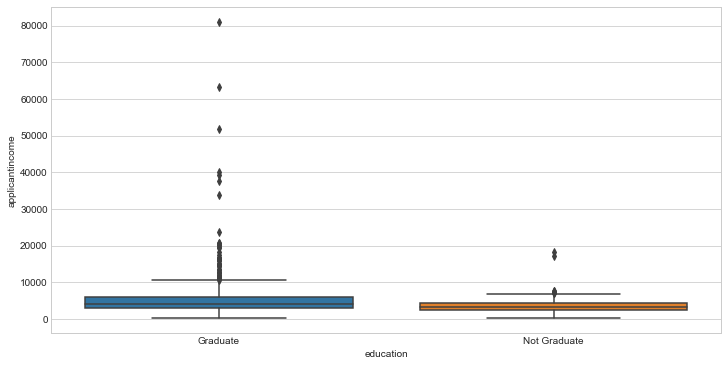

In [18]:
plt.figure(figsize=(12,6))
sb.boxplot(y='applicantincome',x='education',data=train)
plt.show()

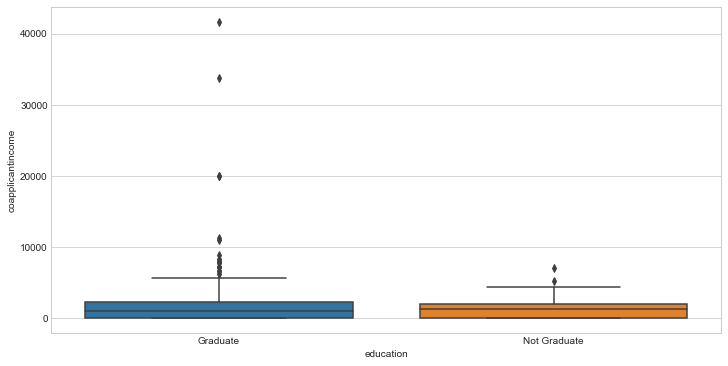

In [19]:
plt.figure(figsize=(12,6))
sb.boxplot(y='coapplicantincome',x='education',data=train)
plt.show()

#### above two box plots suggests that, graduates are geeting higher salaries (income) when compared to non-graduates.We can remove outliers, however, it's better to convert the distrubution to normal as outliers highly paid graduates

### Bivariate Features

In [20]:
def bivariate(x,y):
    varb=pd.crosstab(train[x],train[y])
    varb.div(varb.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,8))
    plt.ylabel('Percentage')

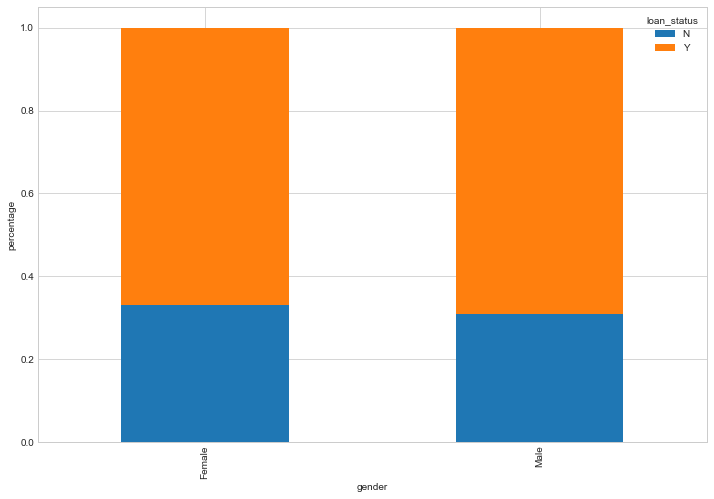

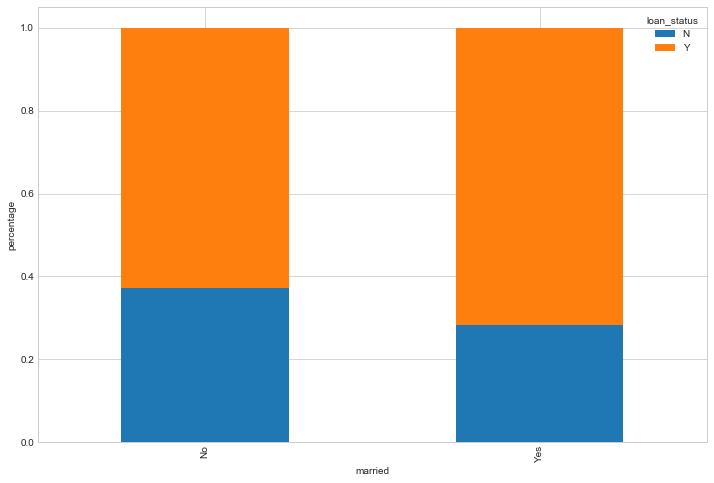

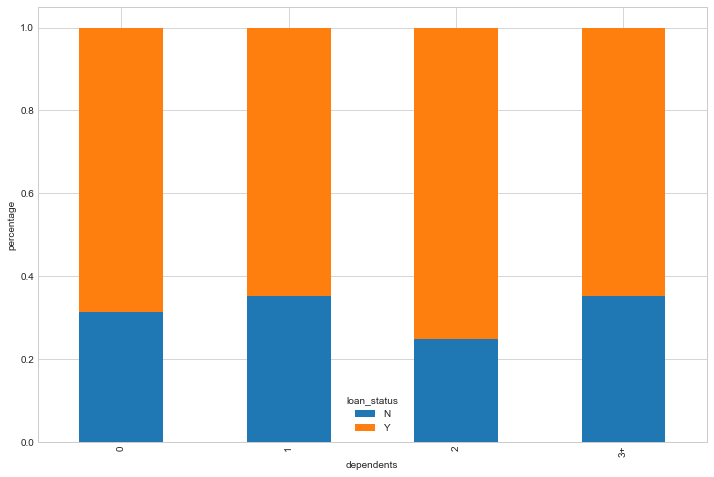

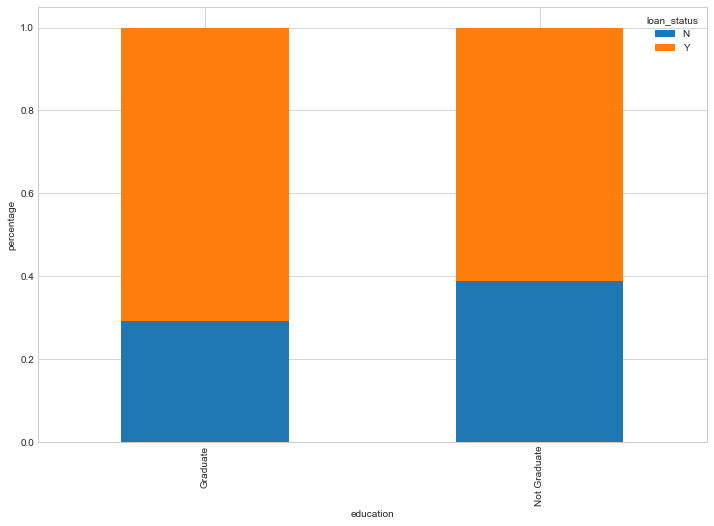

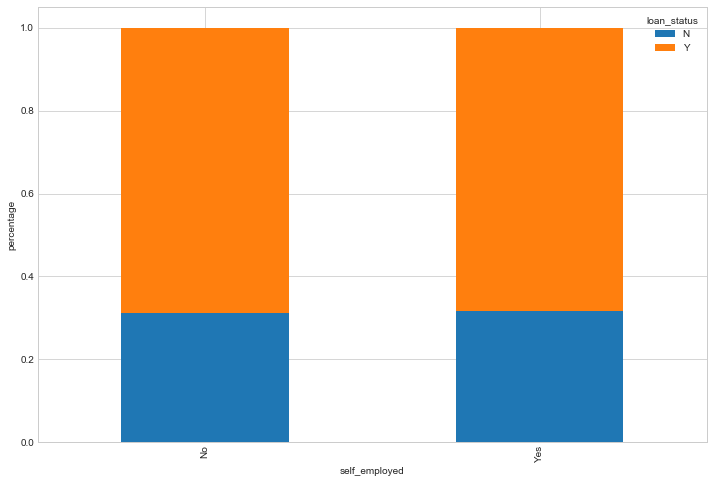

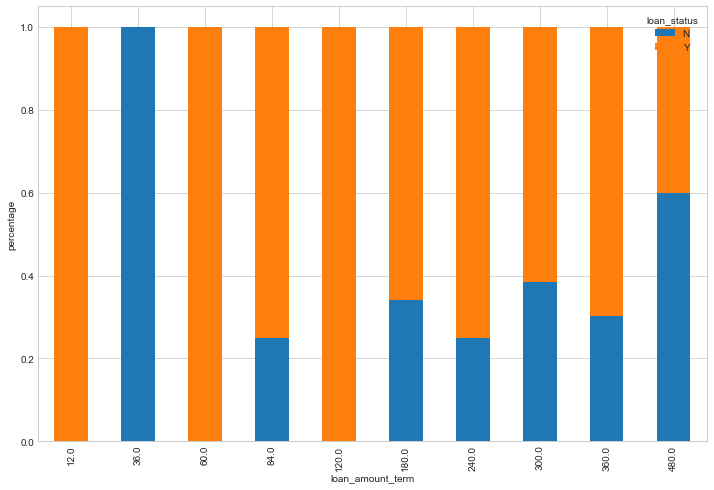

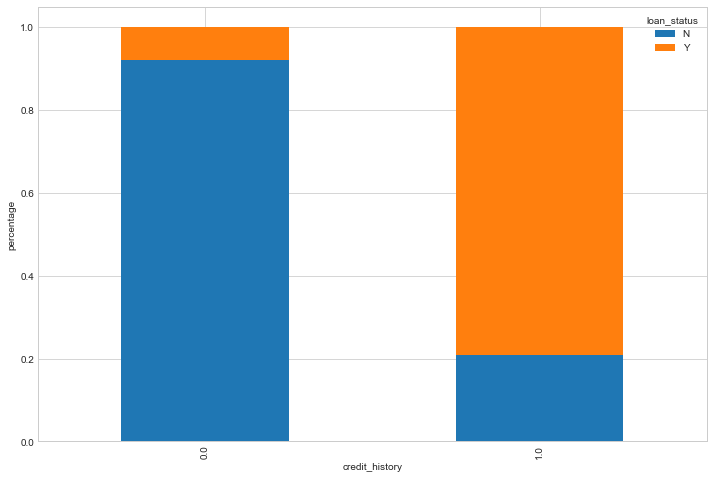

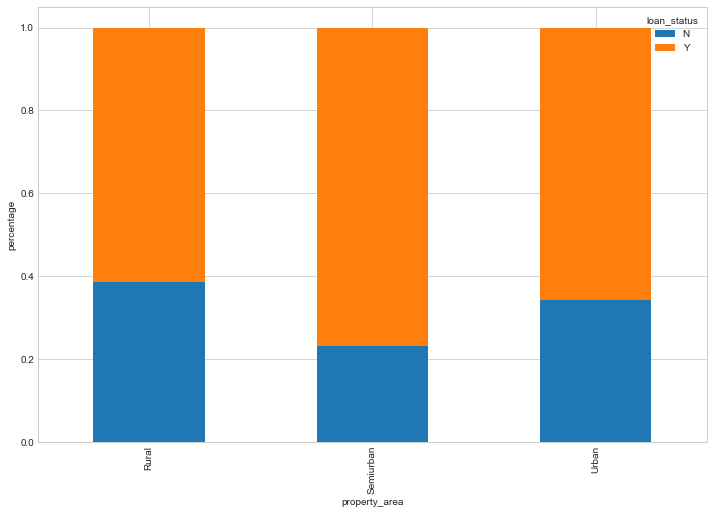

In [21]:
catVars=[ 'gender', 'married', 'dependents', 'education', 'self_employed',
         'loan_amount_term', 'credit_history', 'property_area']

for var in catVars:
    bivariate(var,'loan_status')
    plt.ylabel('percentage')

#### gender: gender seems to be not an important factor for a loan approval
#### married: married man/woman has more chances of loan approval
#### dependents: customer with two dependents have more chances of loan approval followed by no dependents
#### education: graduates have chance of loan approval (satisfis hypothesis)
#### self_employed: this variable seems not of an importance
#### repayment term or loan_amount_term: Although there are ebbs and flows in this plot, for the matter of fact, 
#### lower repayment term has higher sucess rate than higher repayment term (satisfies hypothesis)  
#### credit_history: customer with better credit history has higher chances of loan approval (satisfies hypothesis)
#### property_area: properties in semi_urban has higher chance of loan approval 
#### (goes against hypothesis of property in urban area has higher chance of approval)

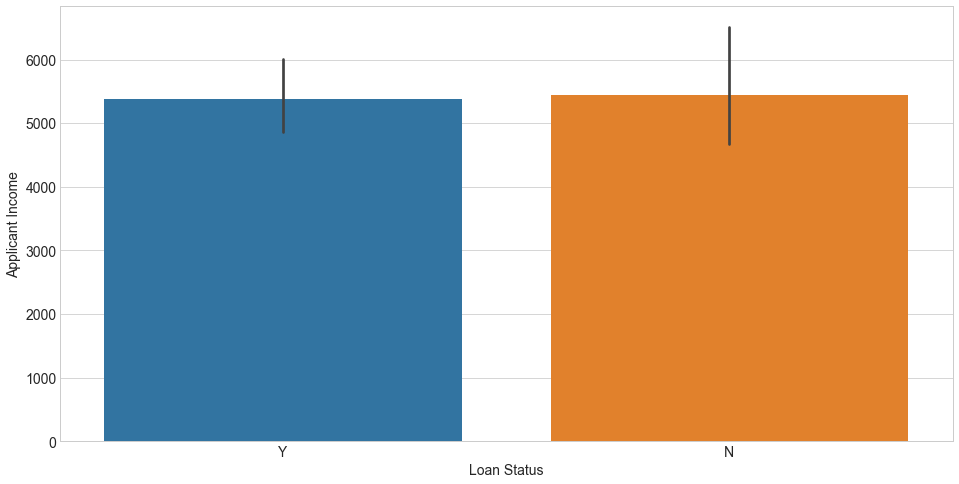

In [22]:
plt.figure(figsize=(16,8))
sb.barplot(y='applicantincome',x='loan_status',data=train)
plt.ylabel('Applicant Income',fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Loan Status',fontsize=14)
plt.xticks(fontsize=14)
plt.show()

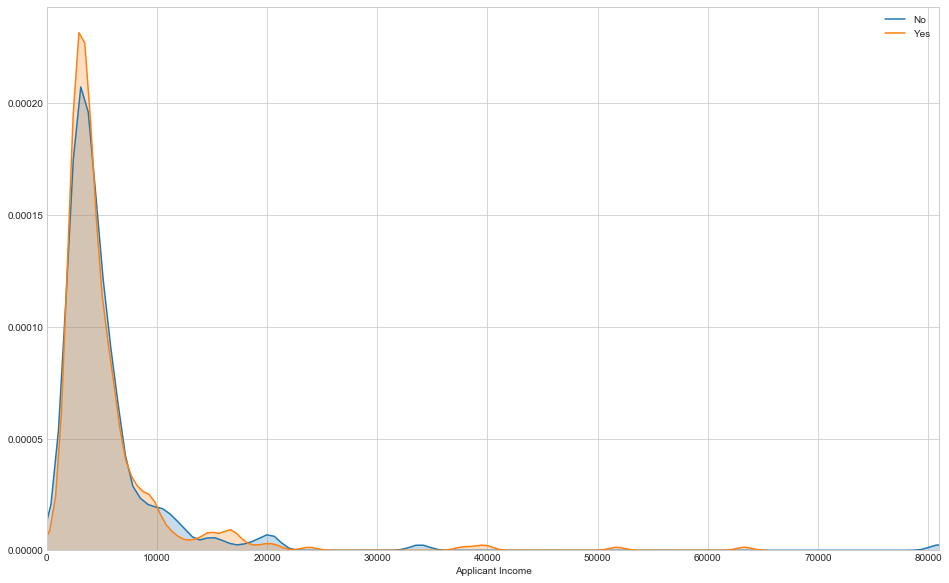

In [23]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0,train.applicantincome.max()])
plt.xlabel('Applicant Income')
plt.show()

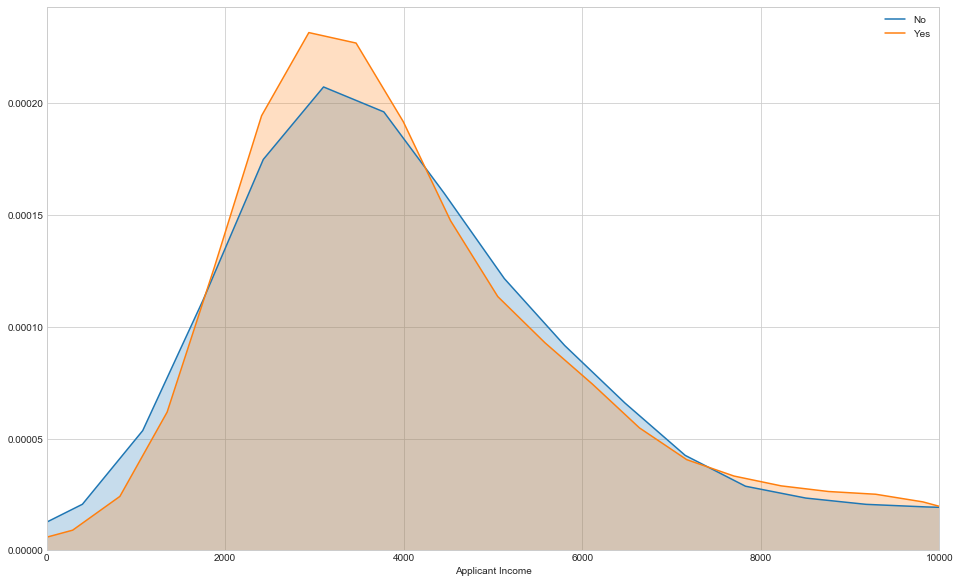

In [24]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0, 10000])
plt.xlabel('Applicant Income')
plt.show()

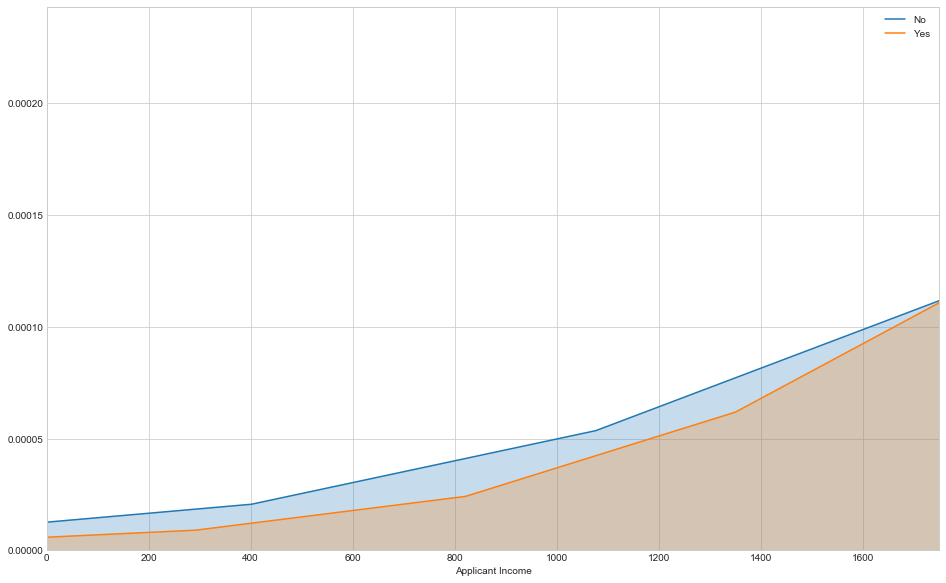

In [25]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0, 1750])
plt.xlabel('Applicant Income')
plt.show()
#0-1750

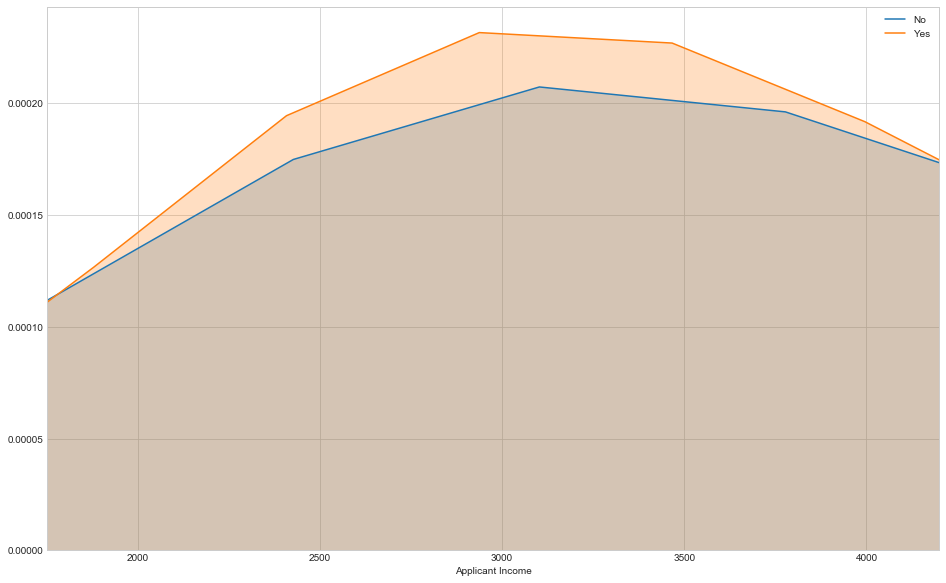

In [26]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([1750,4200])
plt.xlabel('Applicant Income')
plt.show()
# 1750-4200

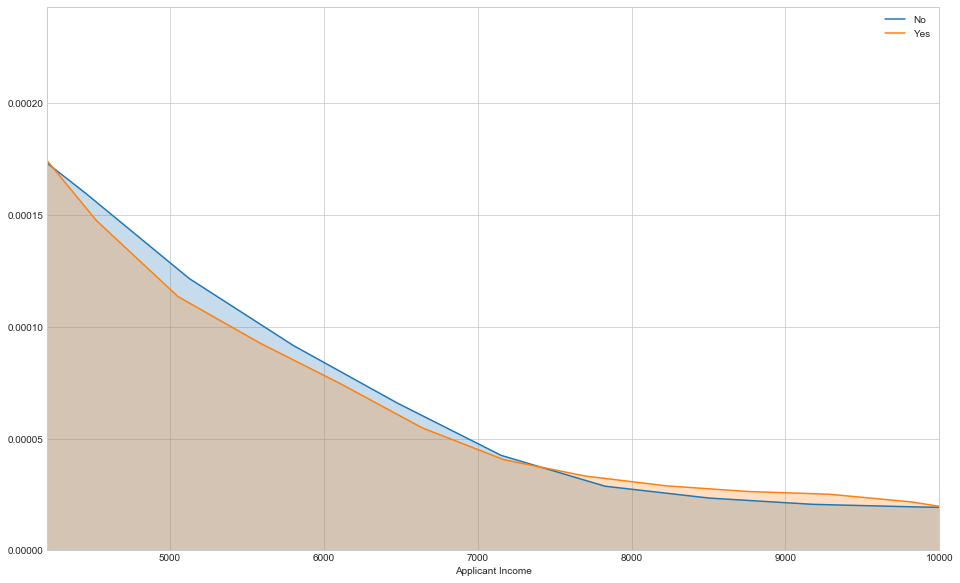

In [27]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([4200,10000])
plt.xlabel('Applicant Income')
plt.show()
#4200-10,000
#although at 7300, there is a transition but I feel that it might overfit the training data

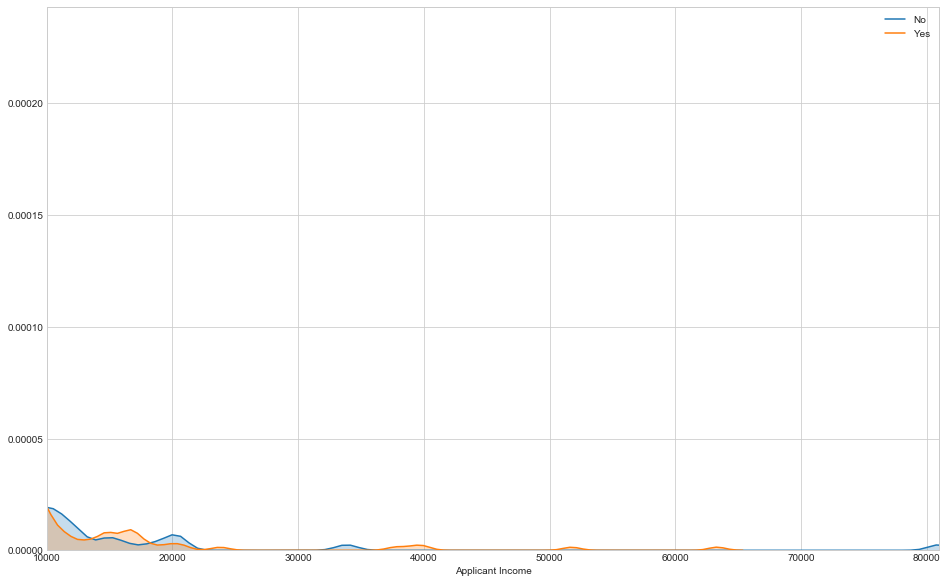

In [28]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.applicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.applicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([10000,train.applicantincome.max()])
plt.xlabel('Applicant Income')
plt.show()
#10000+

#### based on the above graphs, we can bin applicant income into following bins...
#### [0-1750 1750-4200 4200-10000 10000+]

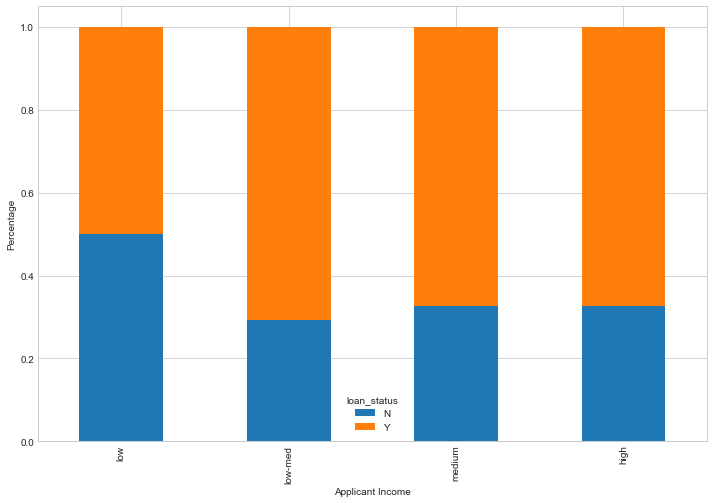

In [29]:
bins=[0,1750,4200,10000,train.applicantincome.max()]
labels=['low','low-med','medium','high']
# bins=[0, 4200,10000,train.applicantincome.max()]
# labels=['low','medium','high']
train['ai_bins']=pd.cut(train.applicantincome,bins=bins,labels=labels)
bivariate('ai_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Applicant Income')
plt.show()

#### low income group is having less chances of having a loan when compared to other groups. From the above graph we can combine medium and high income groups into one grop as they have similar loan approval rates

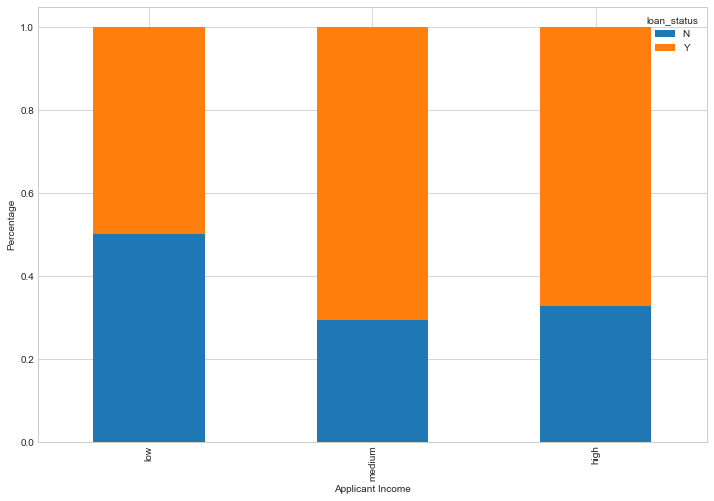

In [30]:
bins=[0,1750,4200,train.applicantincome.max()]
labels=['low','medium','high']
# bins=[0, 4200,10000,train.applicantincome.max()]
# labels=['low','medium','high']
train['ai_bins']=pd.cut(train.applicantincome,bins=bins,labels=labels)
bivariate('ai_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Applicant Income')
plt.show()

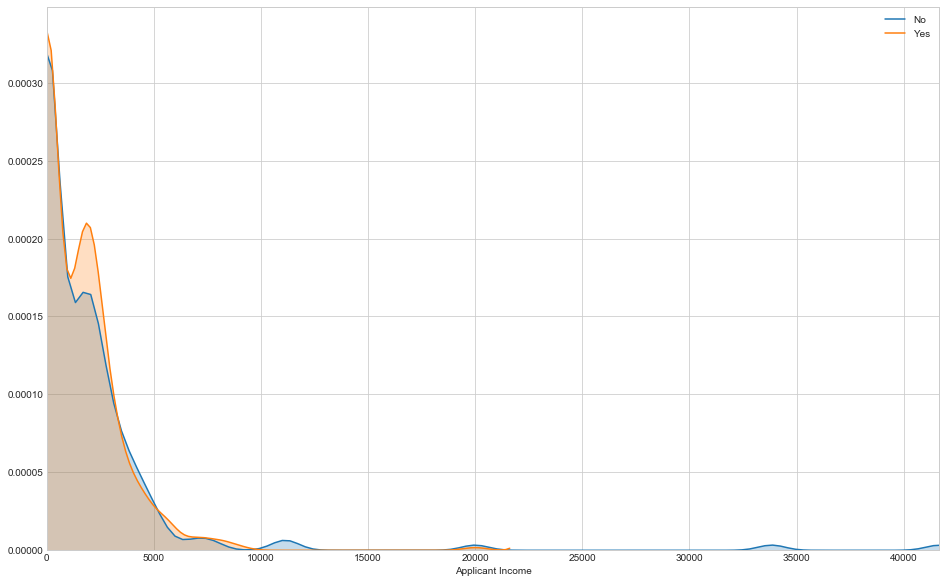

In [31]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.coapplicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.coapplicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0,train.coapplicantincome.max()])
plt.xlabel('Applicant Income')
plt.show()

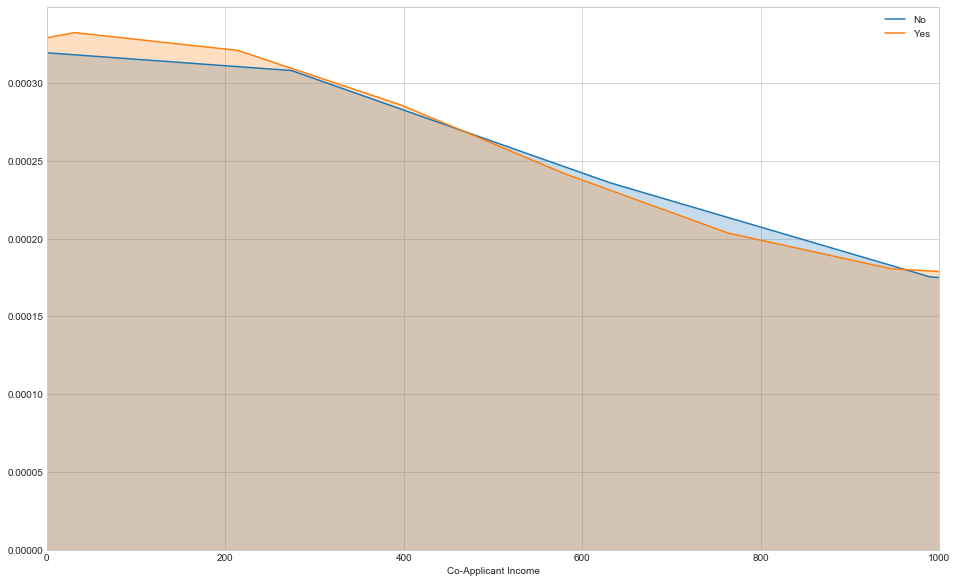

In [32]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.coapplicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.coapplicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0,1000])
plt.xlabel('Co-Applicant Income')
plt.show()

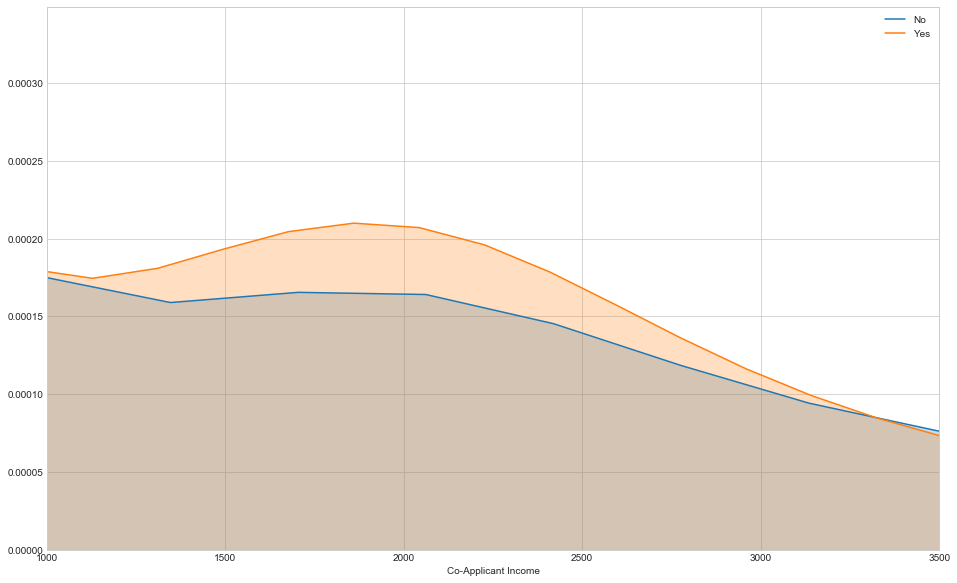

In [33]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.coapplicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.coapplicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([1000,3500])
plt.xlabel('Co-Applicant Income')
plt.show()
#1000-3500

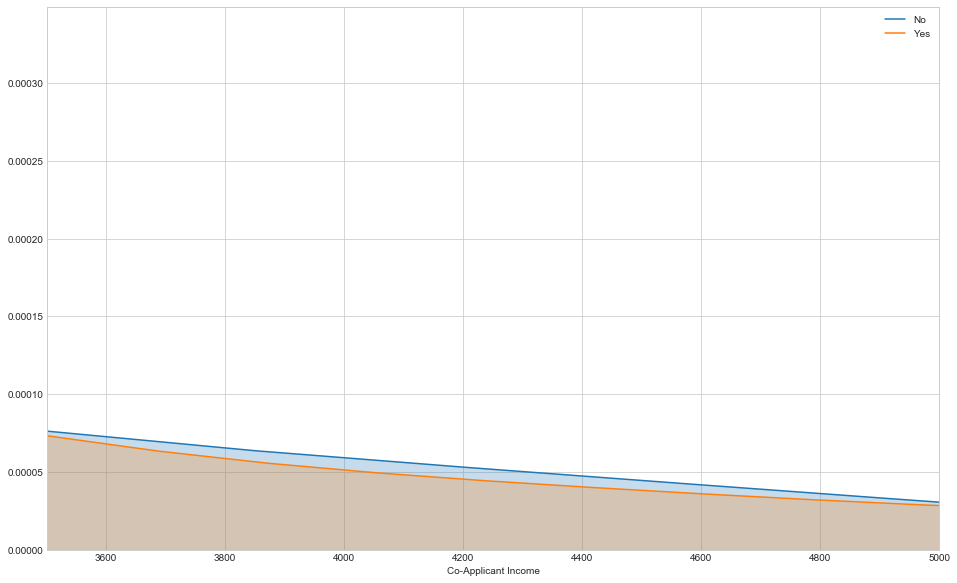

In [34]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.coapplicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.coapplicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([3500,5000])
plt.xlabel('Co-Applicant Income')
plt.show()
#3500-5000

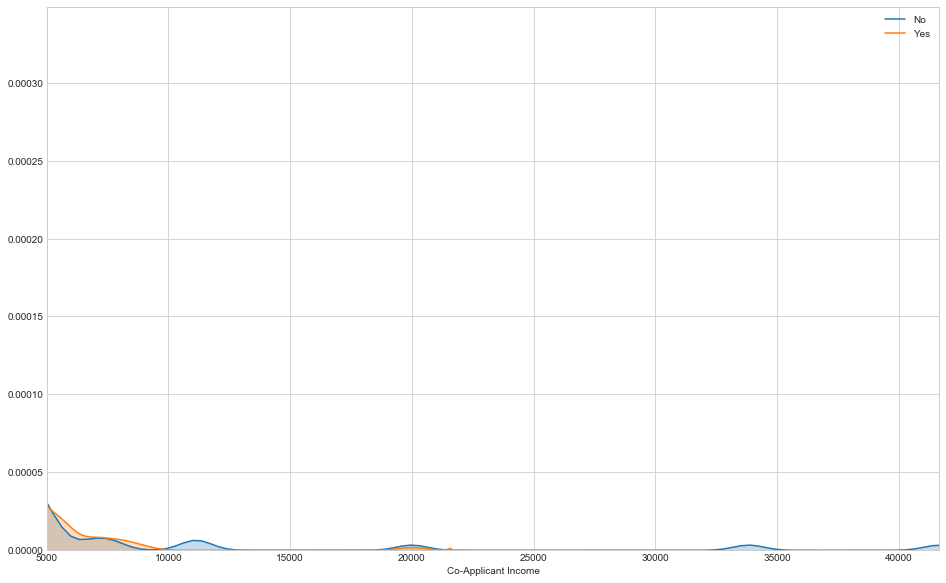

In [35]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.coapplicantincome[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.coapplicantincome[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([5000,train.coapplicantincome.max()])
plt.xlabel('Co-Applicant Income')
plt.show()
#5000+

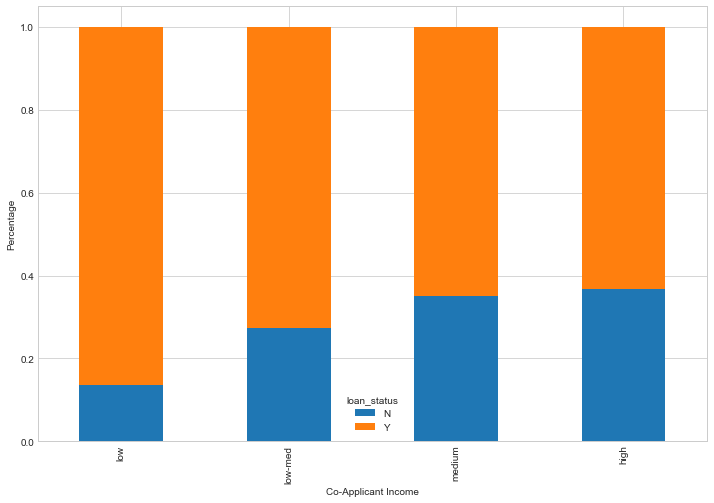

In [36]:
bins=[0,1000,3500,5000,train.coapplicantincome.max()]
labels=['low','low-med','medium','high']
# bins=[0, 4200,10000,train.applicantincome.max()]
# labels=['low','medium','high']
train['coai_bins']=pd.cut(train.coapplicantincome,bins=bins,labels=labels)
bivariate('coai_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Co-Applicant Income')
plt.show()

#### customers whose co-applicant's income is low got loan approval. This is very strange. Let us explore why is this happenning

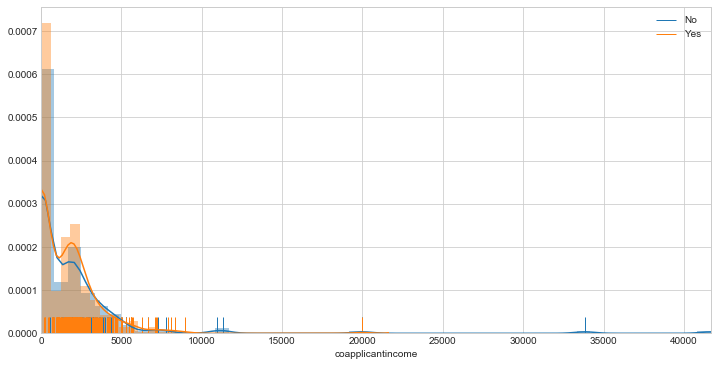

In [37]:
plt.figure(figsize=(12,6))
sb.distplot(train.coapplicantincome[train.loan_status=='N'],rug=True)
sb.distplot(train.coapplicantincome[train.loan_status=='Y'],rug=True)
plt.legend(['No','Yes'])
plt.xlim([0,train.coapplicantincome.max()])
plt.show()

#### In the above plot, customers who got the loan (Y) had 0 income from their co-applicant. This is the reason why 'low' co-applicants have higher sucess of loan approval. One way to over come this is to add both the incomes (applicant and co-applicant)

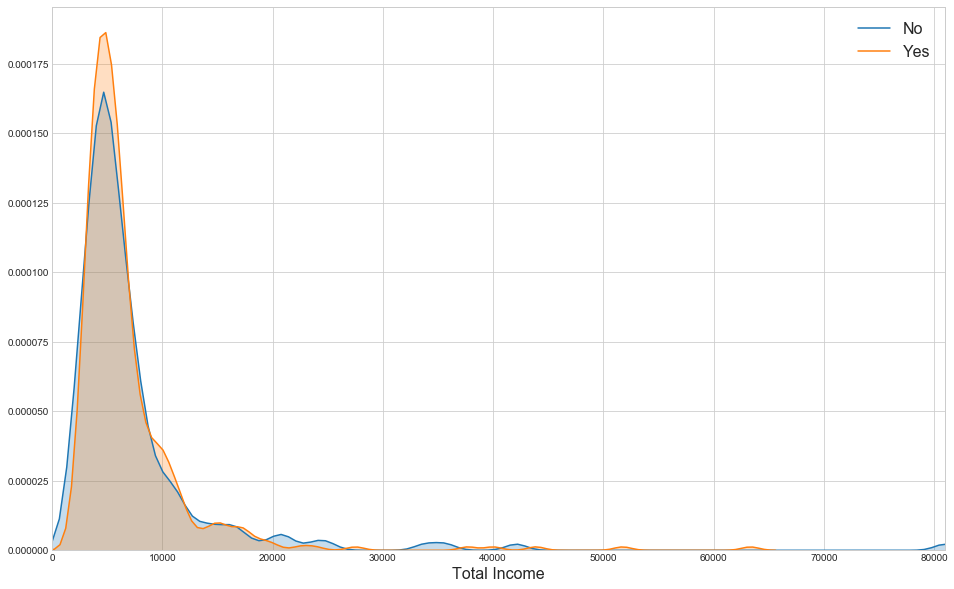

In [38]:
train['total_income']=train['applicantincome']+train['coapplicantincome']
plt.figure(figsize=(16,10))
sb.kdeplot(train.total_income[train.loan_status=='N'],shade=True)
sb.kdeplot(train.total_income[train.loan_status=='Y'],shade=True)
plt.legend(['No','Yes'],fontsize=16)
plt.xlim([0,train.total_income.max()])
plt.xlabel('Total Income',fontsize=16)
plt.show()

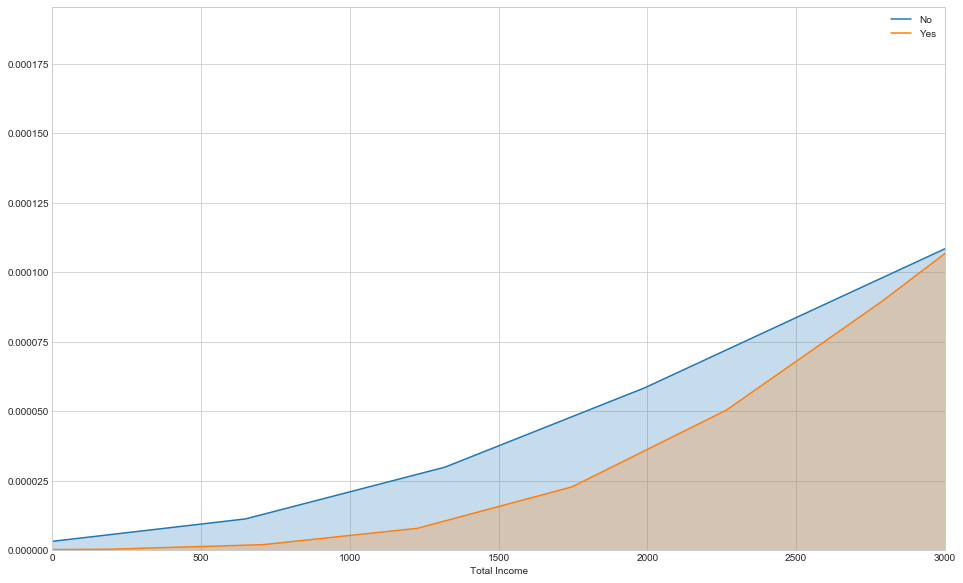

In [39]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.total_income[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.total_income[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0,3000])
plt.xlabel('Total Income')
plt.show()
#0-3000 is first bin

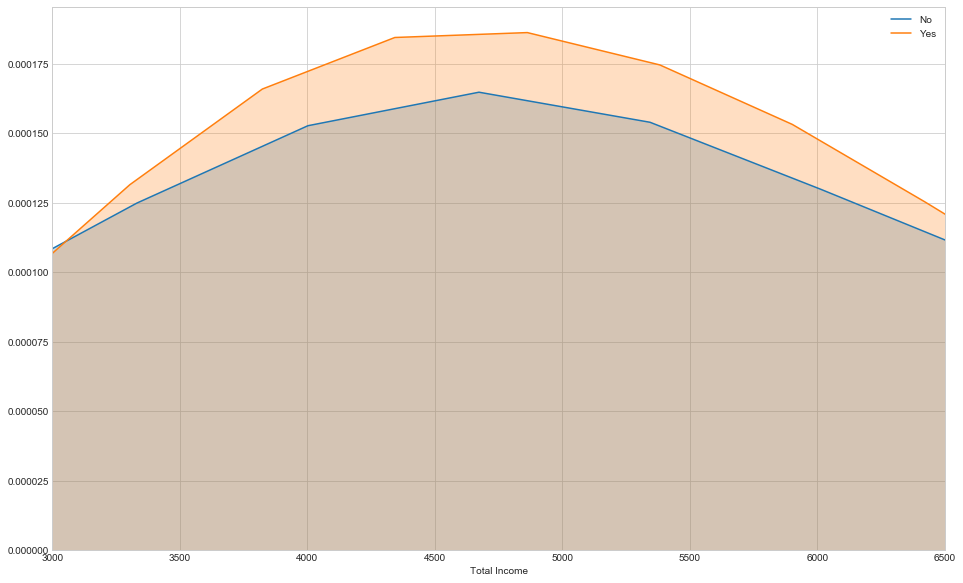

In [40]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.total_income[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.total_income[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([3000,6500])
plt.xlabel('Total Income')
plt.show()
#3000-6500

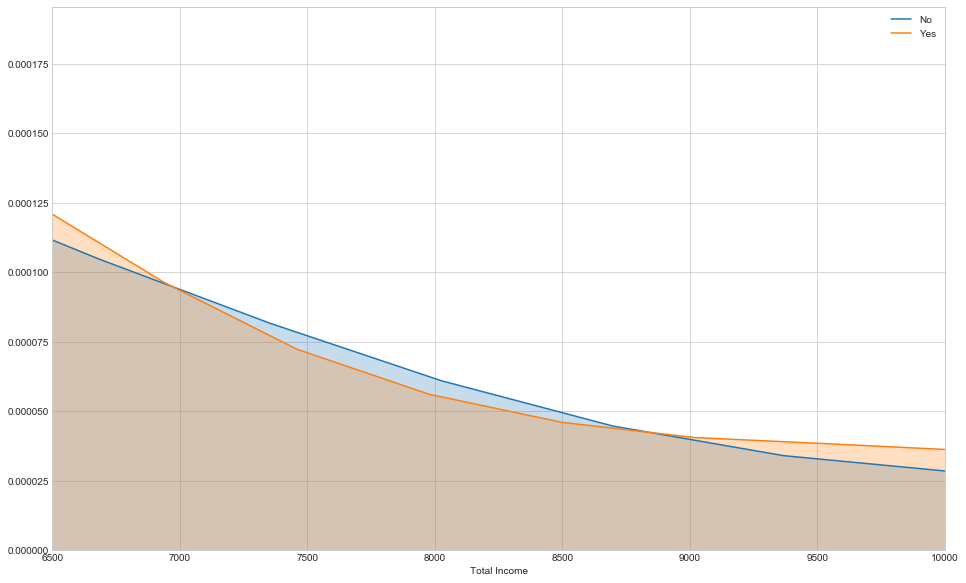

In [41]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.total_income[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.total_income[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([6500,10000])
plt.xlabel('Total Income')
plt.show()
#6000-10000

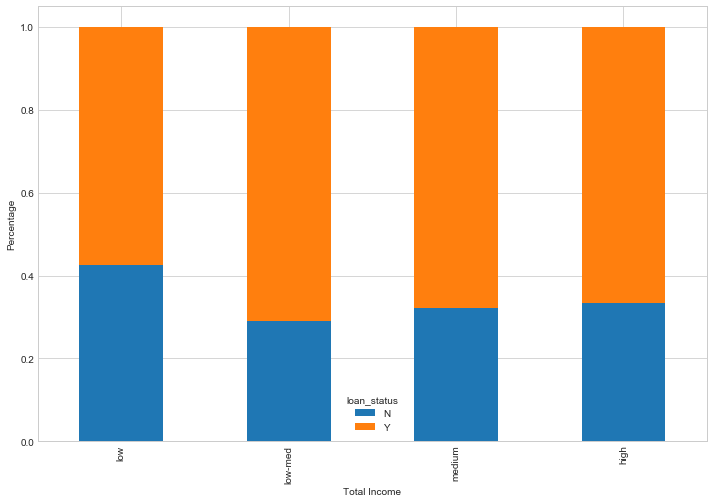

In [42]:
# bins=[0,1750,4200,train.applicantincome.max()]
# labels=['low','medium','high']
bins=[0,3000,6500,10000,train.total_income.max()]
# bins=[0,2500,4000,6000,train.total_income.max()]
labels=['low','low-med','medium','high']
train['ti_bins']=pd.cut(train.total_income,bins=bins,labels=labels)
bivariate('ti_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Total Income')
plt.show()

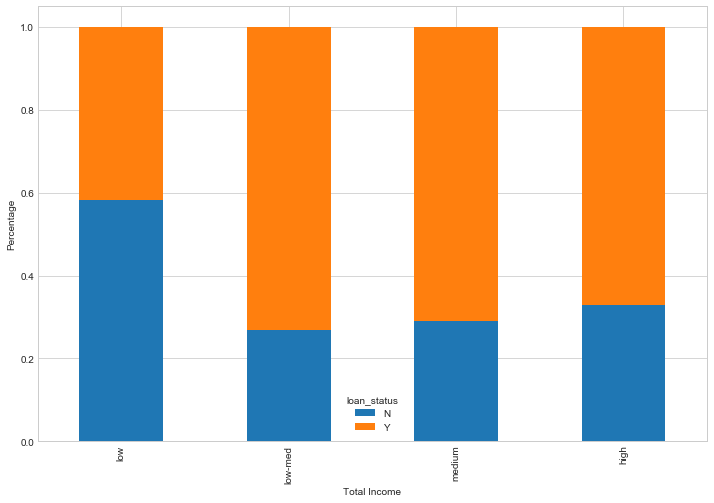

In [43]:
# bins=[0,1750,4200,train.applicantincome.max()]
# labels=['low','medium','high']
# bins=[0,3000,6500,10000,train.total_income.max()]
bins=[0,2500,4000,6000,train.total_income.max()]
labels=['low','low-med','medium','high']
train['ti_bins']=pd.cut(train.total_income,bins=bins,labels=labels)
bivariate('ti_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Total Income')
plt.show()

#### I tried many ranges for the bins, however, the above ranges seems to be reasonable.
#### This shows a better picture of income vs loan status. Low income has less chances of loan approval when compared to medium and high income ranges

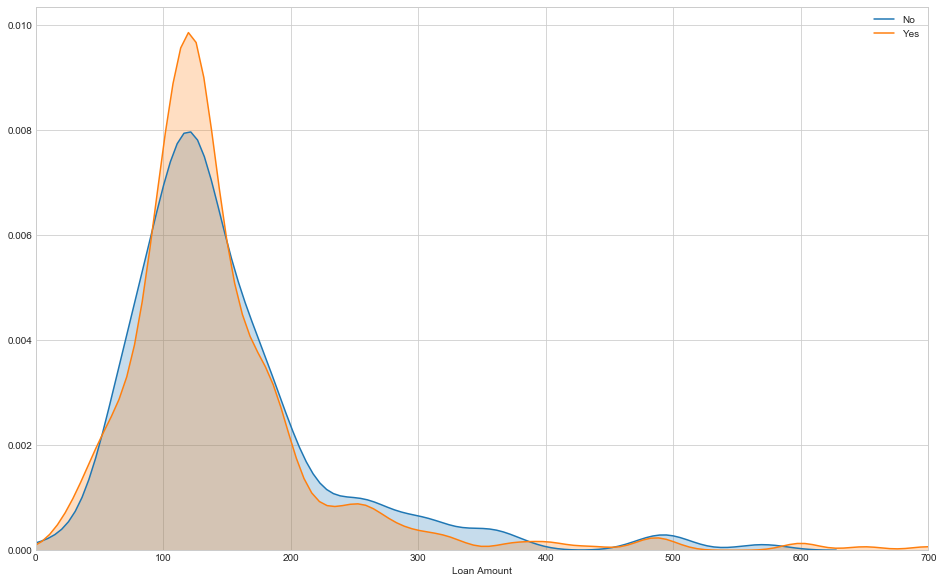

In [44]:
plt.figure(figsize=(16,10))
sb.kdeplot(train.loanamount[train.loan_status=='N'],label='No',shade=True)
sb.kdeplot(train.loanamount[train.loan_status=='Y'],label='Yes',shade=True)
plt.xlim([0, train.loanamount.max()])
plt.xlabel('Loan Amount')
plt.show()
#6000-10000

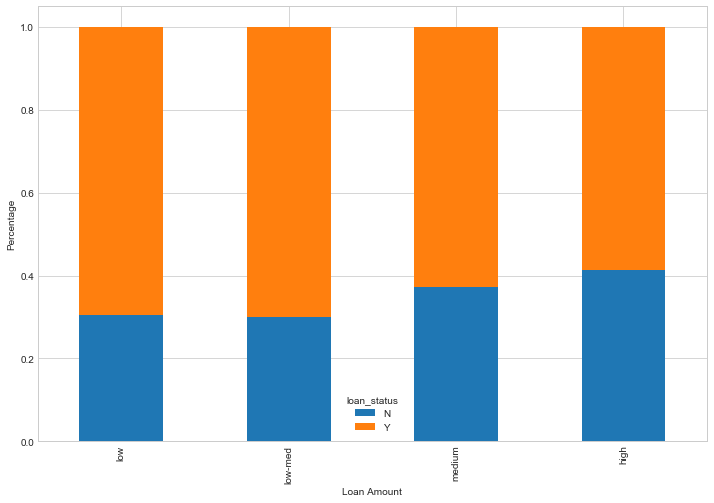

In [45]:
# bins=[0,200,300,train.loanamount.max()]
# labels=['low','medium','high']
bins=[0,100,200,300,train.loanamount.max()]
labels=['low','low-med','medium','high']
train['la_bins']=pd.cut(train.loanamount,bins=bins,labels=labels)
bivariate('la_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Loan Amount')
plt.show()

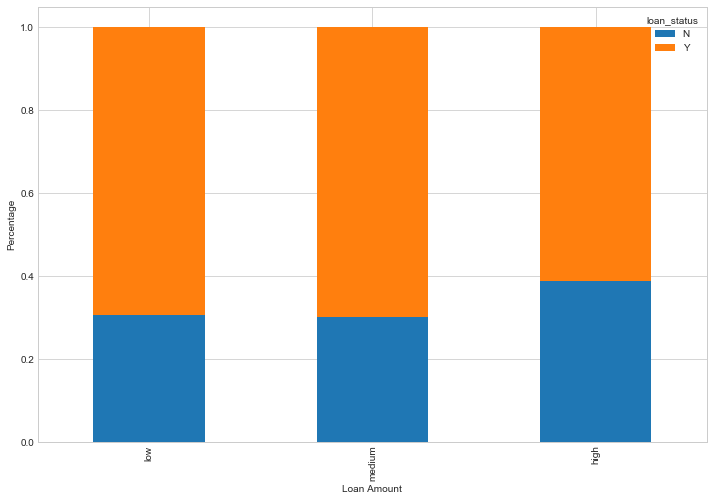

In [46]:
bins=[0,100,200,train.loanamount.max()]
labels=['low','medium','high']
# bins=[0,100,200,300,train.loanamount.max()]
# labels=['low','low-med','medium','high']
train['la_bins']=pd.cut(train.loanamount,bins=bins,labels=labels)
bivariate('la_bins','loan_status')
plt.ylabel('Percentage')
plt.xlabel('Loan Amount')
plt.show()

#### Above figure shows that if the loan amount is low, then the chances of loan approval are high, whereas, if the loan amount is high, then the loan approval chances ar low

# Feature Engineering

In [47]:
train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'ai_bins', 'coai_bins', 'total_income', 'ti_bins', 'la_bins'],
      dtype='object')

#### let us generate fe new features from existing features: 
###    emi=loanamount/loan_term 
###    edu_credit=education*credit_history
###    money_left=total_income-emi

In [48]:
train['emi']=train['loanamount']/train['loan_amount_term']

edu_map={'Graduate':1,'Not Graduate':0}
train.education=train.education.map(edu_map)
train['edu_credit']=train['education']*train['credit_history']

test['emi']=test['loanamount']/train['loan_amount_term']

edu_map={'Graduate':1,'Not Graduate':0}
test.education=test.education.map(edu_map)
test['edu_credit']=test['education']*test['credit_history']

# train['money_left']=train['loanamount']-train['emi']


### Let us convert the test dataset as well

In [49]:
test['total_income']=test['applicantincome']+test['coapplicantincome']
bins=[0,2500,4000,6000,test.total_income.max()]
labels=['low','low-med','medium','high']
test['ti_bins']=pd.cut(test['total_income'],bins=bins,labels=labels)

bins=[0,100,200,test.loanamount.max()]
labels=['low','medium','high']
test['la_bins']=pd.cut(test['loanamount'],bins=bins,labels=labels)


In [50]:
train_final=train.drop(['applicantincome','ai_bins','coapplicantincome', 'coai_bins',
                        'total_income','loanamount','loan_id'],axis=1)
test_final=test.drop(['applicantincome', 'coapplicantincome',
                      'loanamount','total_income','loan_id'],axis=1)

In [51]:
train_final.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status',
       'ti_bins', 'la_bins', 'emi', 'edu_credit'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
for fnames in train_final.drop('loan_status',axis=1).columns:
    if (isinstance(train_final[fnames][0],str)):
        print('string feature is:',fnames)
        le=LabelEncoder()
        train_final[fnames]=le.fit_transform(train_final[fnames])
        test_final[fnames]=le.transform(test_final[fnames])

loanStatus={'Y':1,'N':0}
train_final['loan_status']=train['loan_status'].map(loanStatus)

string feature is: gender
string feature is: married
string feature is: dependents
string feature is: self_employed
string feature is: property_area
string feature is: ti_bins
string feature is: la_bins


# Predictive Modelling

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

x=train_final.drop('loan_status',axis=1)
y=train_final.loan_status

In [139]:
clf_log=LogisticRegression()
clf_logCV=cross_val_score(clf_log,x,y,cv=5)
print('Logistic Regression CV Accuracy (Mean +/-std):', clf_logCV.mean(),'(+/-',clf_logCV.std(),')')



Logistic Regression CV Accuracy (Mean +/-std): 0.8045581767293083 (+/- 0.028636117488123045 )


In [135]:

# param={'C':np.linspace(0.0001,1000,50)}
# clfGrid=GridSearchCV(clf_log,param,scoring='accuracy',cv=5,n_jobs=-1).fit(x,y)
# clf_logGrid=cross_val_score(clfGrid.best_estimator_,x,y,cv=5)
# print('Logistic Regression CV Accuracy (Mean +/-std):',
#       clfGrid.best_estimator_.mean(),'(+/-',clfGrid.best_estimator_.std(),')')

In [137]:
# clf_logGrid=cross_val_score(clfGrid.best_estimator_,x,y,cv=5)
# print('Logistic Regression CV Accuracy (Mean +/-std):',
#       clf_logGrid.mean(),'(+/-',clf_logGrid.std(),')')
# pred1=clfGrid.best_estimator_.predict(test_final)
# submission=pd.DataFrame({'Loan_ID':test.loan_id,
#                         'Loan_Status':pred})
# loanStatus={1:'Y',0:'N'}
# submission['Loan_Status']=submission['Loan_Status'].map(loanStatus)
# submission.to_csv('submissionV2.csv',index=False)

In [140]:
clf_log.fit(x,y)
pred=clf_log.predict(test_final)


In [56]:
submission=pd.DataFrame({'Loan_ID':test.loan_id,
                        'Loan_Status':pred})
loanStatus={1:'Y',0:'N'}
submission['Loan_Status']=submission['Loan_Status'].map(loanStatus)
submission.to_csv('submissionV1.csv',index=False)

# Feature Selection

In [173]:
from sklearn.feature_selection import SelectKBest
clf_log=LogisticRegression()
sel_chi2=SelectKBest(score_func=chi2, k=5)
x_chi2=sel_chi2.fit_transform(x,y)
clf_logCV=cross_val_score(clf_log,x_chi2,y,cv=5)
print('Logistic Regression CV Accuracy (Mean +/-std):', clf_logCV.mean(),'(+/-',clf_logCV.std(),')')

Logistic Regression CV Accuracy (Mean +/-std): 0.809462881514061 (+/- 0.027383073694490688 )


In [175]:
x.columns[sel_chi2.get_support()]

Index(['married', 'loan_amount_term', 'credit_history', 'ti_bins',
       'edu_credit'],
      dtype='object')

In [176]:
clf_log.fit(x_chi2,y)
pred=clf_log.predict(test_final.loc[:,x.columns[sel_chi2.get_support()]])
submission=pd.DataFrame({'Loan_ID':test.loan_id,
                        'Loan_Status':pred})
loanStatus={1:'Y',0:'N'}
submission['Loan_Status']=submission['Loan_Status'].map(loanStatus)
submission.to_csv('submissionV3.csv',index=False)

### with feature selection, the accuracy on test data is 77% and without feature selection the accuracy is 78.4%

# Using another approach to increase the accuracy

In [378]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=df_train.copy()

In [218]:
df_cat=[]
df_num=[]

for i,dy in enumerate(df.dtypes):
    if dy=='object':
        df_cat.append(df.iloc[:,i])
    else:
        df_num.append(df.iloc[:,i])
df_cat=pd.DataFrame(df_cat).T
df_cat=df_cat.drop('Loan_ID',axis=1)
df_num=pd.DataFrame(df_num).T

In [219]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [220]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [221]:
for fea in df_cat.columns:
    df_cat[fea].fillna(df_cat[fea].value_counts().index[0],inplace=True)

for fea in df_num.columns:
    df_num[fea].fillna(df[fea].median(),inplace=True)
    
# df_cat=df_cat.lambda(x:x.fillna(x.value_counts().index[0]))
# df_num=df_num.lambda(x:x.fillna(x.median))

In [223]:
le=LabelEncoder()
for fea in df_cat.columns:
    df_cat[fea]=le.fit_transform(df_cat[fea])

In [226]:
df_final=pd.concat([df_num,df_cat],axis=1)
x=df_final.drop('Loan_Status',axis=1)
y=df_final.Loan_Status
df_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,0,2,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1


In [232]:
clf_log=LogisticRegression(random_state=42)
np.mean(cross_val_score(clf_log,x,y))

0.8

In [201]:
target=df_cat.Loan_Status

In [224]:
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

def metrics(y_true, y_pred, retu=False):
    print(classification_report(y_true,y_pred))
def metrics_avg(y_true, y_pred, retu=False):
    acc=accuracy_score(y_true,y_pred)
    pre=precision_score(y_true,y_pred)
    rec=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    return acc,pre,rec,f1

In [254]:
from sklearn.model_selection import StratifiedShuffleSplit
x=df_final.drop('Loan_Status',axis=1)
y=df_final.Loan_Status
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('x_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts(normalize=True).values)
print('ratio of target in y_test :',y_test.value_counts(normalize=True).values)
print('ratio of target in original_data :',df['Loan_Status'].value_counts(normalize=True).values)

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [257]:
def train_eval_train(models, x, y):
    for name, model in models.items():
        print(name,':')
        model.fit(x, y)
        metrics(y, model.predict(x))
        print('-'*30)
        
train_eval_train(models, x_train,y_train)

LogisticRegression :
              precision    recall  f1-score   support

           0       0.89      0.41      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491

------------------------------
KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.59      0.31      0.41       154
           1       0.74      0.90      0.81       337

    accuracy                           0.71       491
   macro avg       0.66      0.61      0.61       491
weighted avg       0.69      0.71      0.69       491

------------------------------
SVC :
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       154
           1       0.69      1.00      0.82       337

    accuracy                           0.69       491
   macro avg    

In [271]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = ['accuracy','precision','recall','f1']
    for name, model in models.items():
        ls = []
        print(name,':','\n')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(metrics_avg(y.iloc[test], y_pred, retu=True))
            
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
            
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression : 

accuracy     0.794245
precision    0.781539
recall       0.976292
f1           0.867440
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : 

accuracy     0.614939
precision    0.680219
recall       0.827986
f1           0.745964
Name: 0, dtype: float64
------------------------------
SVC : 

accuracy     0.684327
precision    0.685730
recall       0.997059
f1           0.812542
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier : 

accuracy     0.798327
precision    0.782389
recall       0.982175
f1           0.870395
Name: 0, dtype: float64
------------------------------


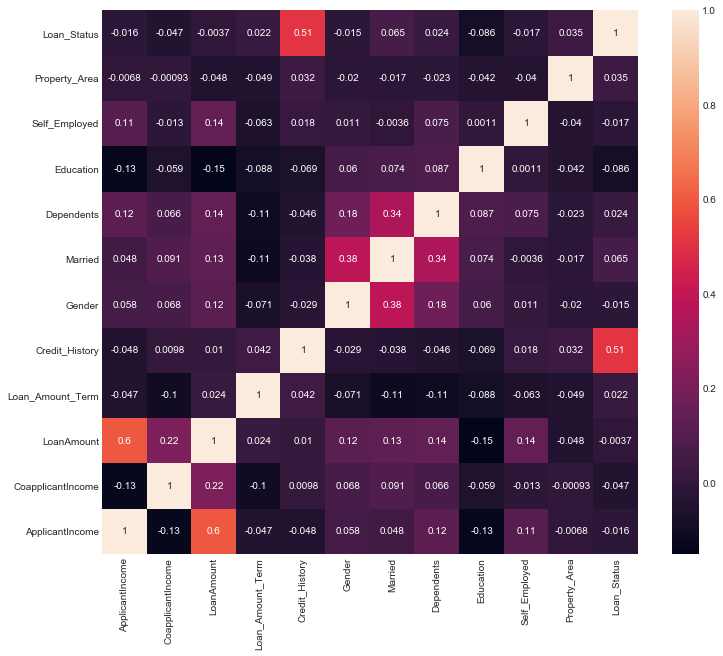

In [294]:
plt.figure(figsize=(12,10))
sb.heatmap(pd.concat([x_train,y_train],axis=1).corr(),annot=True)
plt.ylim([0,12])
plt.show()

## creating new features

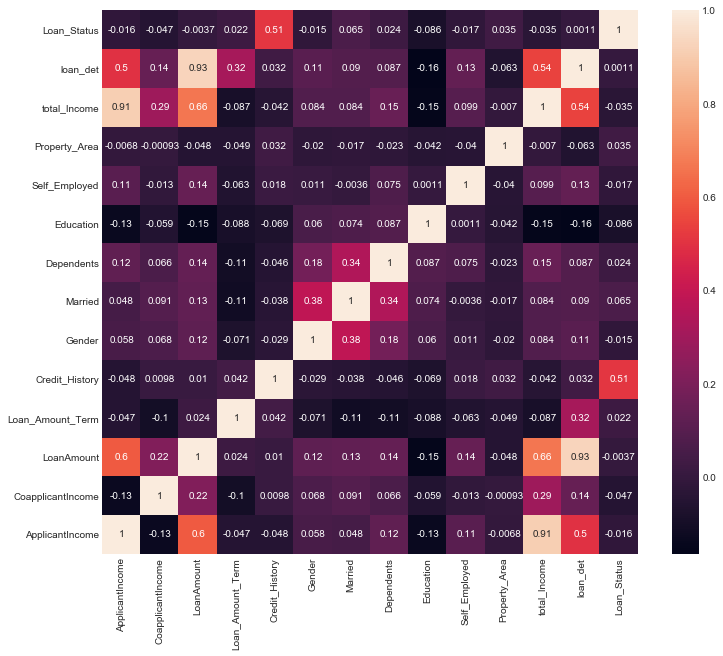

In [304]:
x_train['total_Income']=x_train.ApplicantIncome+x_train.CoapplicantIncome
x_train['loan_det']=x_train.LoanAmount*x_train.Loan_Amount_Term
plt.figure(figsize=(12,10))
sb.heatmap(pd.concat([x_train,y_train],axis=1).corr(),annot=True)
plt.ylim([0,x_train.shape[1]+1])
plt.show()

In [306]:
train_eval_cross(models,x_train,y_train,skf)

LogisticRegression : 

accuracy     0.694531
precision    0.695651
recall       0.991176
f1           0.817139
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : 

accuracy     0.608898
precision    0.674883
recall       0.827540
f1           0.742327
Name: 0, dtype: float64
------------------------------
SVC : 

accuracy     0.686367
precision    0.686367
recall       1.000000
f1           0.813982
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier : 

accuracy     0.798327
precision    0.782389
recall       0.982175
f1           0.870395
Name: 0, dtype: float64
------------------------------


In [308]:
train_eval_cross(models,x_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1),y_train,skf)

LogisticRegression : 

accuracy     0.706776
precision    0.704208
recall       0.997059
f1           0.824519
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : 

accuracy     0.635551
precision    0.687123
recall       0.860784
f1           0.763112
Name: 0, dtype: float64
------------------------------
SVC : 

accuracy     0.686367
precision    0.686367
recall       1.000000
f1           0.813982
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier : 

accuracy     0.798327
precision    0.782389
recall       0.982175
f1           0.870395
Name: 0, dtype: float64
------------------------------


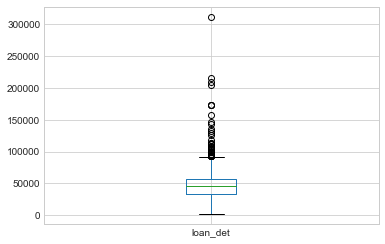

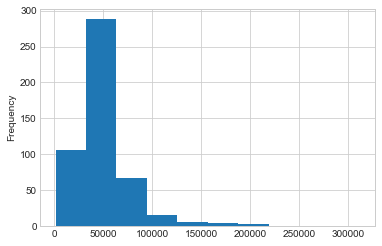

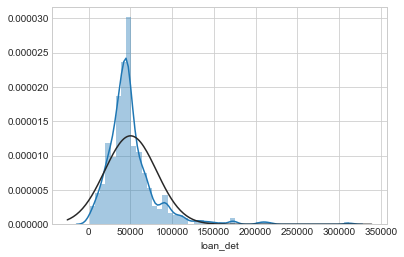

In [319]:
from scipy.stats import norm
x_train1=x_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)
x_train1.loan_det.plot(kind='box') #many outliers
plt.show()
x_train1.loan_det.plot(kind='hist') # skewed..let us use log
plt.show()
sb.distplot(x_train1['loan_det'],fit=norm)
plt.show()

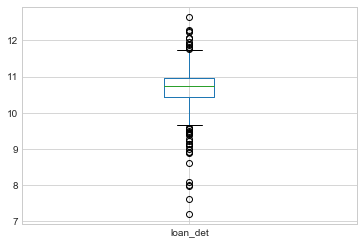

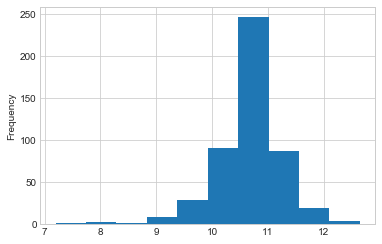

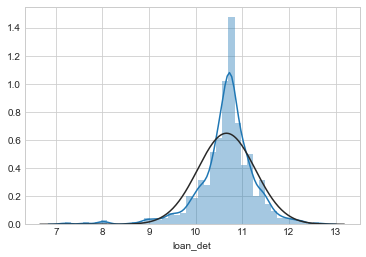

In [321]:
#after log transformation
x_train1['loan_det']=np.log(x_train.loan_det)
x_train1.loan_det.plot(kind='box') #many outliers
plt.show()
x_train1.loan_det.plot(kind='hist') # skewed..let us use log
plt.show()
sb.distplot(x_train1['loan_det'],fit=norm)
plt.show()

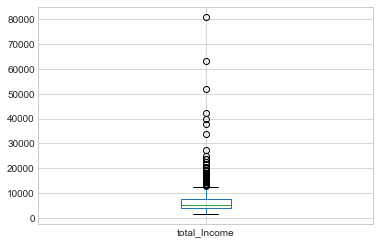

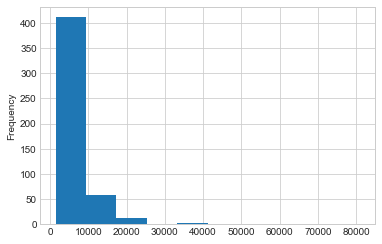

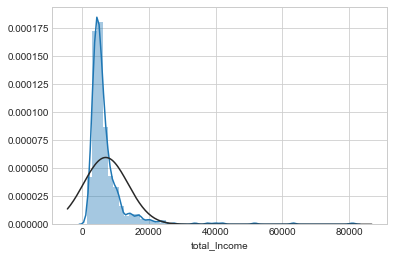

In [324]:
x_train1.total_Income.plot(kind='box') #many outliers
plt.show()
x_train1.total_Income.plot(kind='hist') # skewed..let us use log
plt.show()
sb.distplot(x_train1['total_Income'],fit=norm)
plt.show()

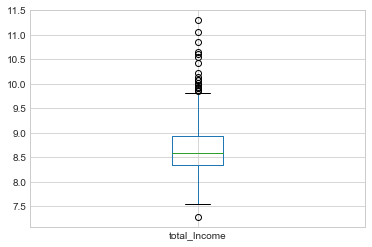

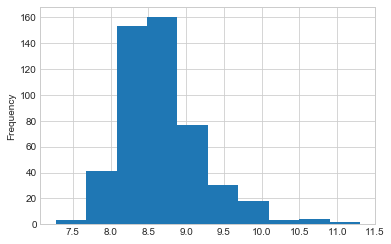

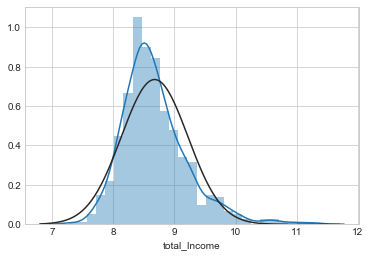

In [325]:
x_train1.total_Income=np.log(x_train1.total_Income)
x_train1.total_Income.plot(kind='box') #many outliers
plt.show()
x_train1.total_Income.plot(kind='hist') # skewed..let us use log
plt.show()
sb.distplot(x_train1['total_Income'],fit=norm)
plt.show()

In [326]:
train_eval_cross(models,x_train1,y_train,skf)

LogisticRegression : 

accuracy     0.798327
precision    0.782389
recall       0.982175
f1           0.870395
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : 

accuracy     0.737224
precision    0.745156
recall       0.940731
f1           0.831136
Name: 0, dtype: float64
------------------------------
SVC : 

accuracy     0.686367
precision    0.686367
recall       1.000000
f1           0.813982
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier : 

accuracy     0.798327
precision    0.782389
recall       0.982175
f1           0.870395
Name: 0, dtype: float64
------------------------------


### Earlier logistic regression had around 70% cross validation accuracy..now it has around 80%

### removing outliers using IQR method

In [351]:
loan_det=x_train1.loan_det
q25,q75=np.quantile(loan_det,[0.25,0.75])
iqr=q75-q25
outls=iqr*0.1
up_cut=q75+outls
lo_cut=q25-outls

outliers=[ val for val in loan_det if val >up_cut or val<lo_cut]
df_outls=pd.concat([x_train1,y_train],axis=1)
# cond=
df_outls=df_outls.drop(df_outls[(df_outls['loan_det']>up_cut) | (df_outls['loan_det']<lo_cut)].index)
df_outls.shape

(272, 10)

In [352]:
train_eval_cross(models,df_outls.drop('Loan_Status',axis=1),df_outls.Loan_Status,skf)

LogisticRegression : 

accuracy     0.856349
precision    0.853188
recall       0.980000
f1           0.910469
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : 

accuracy     0.801323
precision    0.812271
recall       0.955000
f1           0.876960
Name: 0, dtype: float64
------------------------------
SVC : 

accuracy     0.739021
precision    0.739021
recall       1.000000
f1           0.849899
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier : 

accuracy     0.856349
precision    0.853188
recall       0.980000
f1           0.910469
Name: 0, dtype: float64
------------------------------


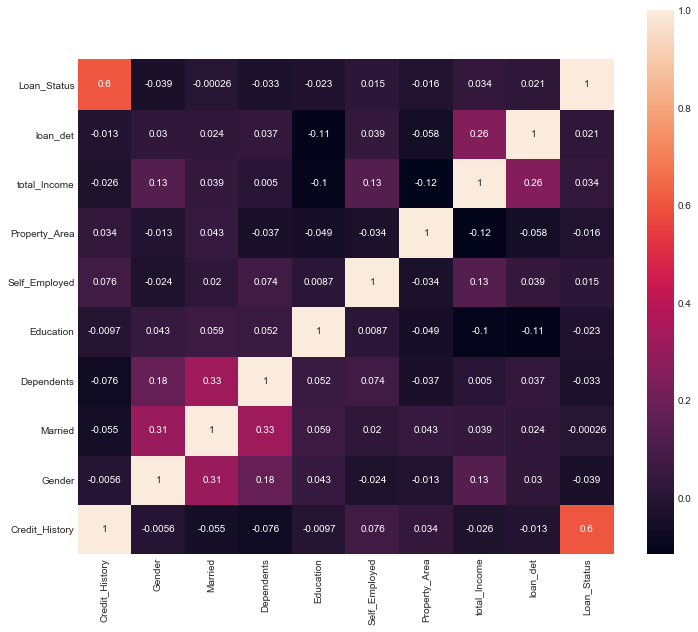

In [353]:
plt.figure(figsize=(12,10))
sb.heatmap(df_outls.corr(),annot=True)
plt.ylim([0,df_outls.shape[1]+1])
plt.show()

In [379]:
df_cat=[]
df_num=[]

for i,dy in enumerate(df_test.dtypes):
    if dy=='object':
        df_cat.append(df_test.iloc[:,i])
    else:
        df_num.append(df_test.iloc[:,i])
df_cat=pd.DataFrame(df_cat).T
loan_id=df_cat['Loan_ID']
df_cat=df_cat.drop('Loan_ID',axis=1)
df_num=pd.DataFrame(df_num).T

for fea in df_cat.columns:
    df_cat[fea].fillna(df_cat[fea].value_counts().index[0],inplace=True)

for fea in df_num.columns:
    df_num[fea].fillna(df[fea].median(),inplace=True)
    
le=LabelEncoder()
for fea in df_cat.columns:
    df_cat[fea]=le.fit_transform(df_cat[fea])

df_test=pd.concat([df_num,df_cat],axis=1)
# df_test['Loan_ID']=loan_id


In [366]:
df_test.drop('Loan_ID',axis=1,inplace=True)

In [374]:
df_test['total_income']=df_test.ApplicantIncome+df_test.CoapplicantIncome
df_test['loan_det']=df_test.Loan_Amount_Term*df_test.LoanAmount
df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1,inplace=True)

In [375]:
df_outls.columns,df_test.columns

(Index(['Credit_History', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'total_Income', 'loan_det',
        'Loan_Status'],
       dtype='object'),
 Index(['Credit_History', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'total_income', 'loan_det'],
       dtype='object'))

In [376]:
clf_log=LogisticRegression()
clf_log.fit(df_outls.drop('Loan_Status',axis=1),df_outls.Loan_Status)
pred=clf_log.predict(df_test)

submission=pd.DataFrame({'Loan_ID':loan_id,
                        'Loan_Status':pred})
loanStatus={1:'Y',0:'N'}
submission['Loan_Status']=submission['Loan_Status'].map(loanStatus)
submission.to_csv('submissionV6.csv',index=False)